## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as smf
import statsmodels.formula.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df_delivery=pd.read_csv('delivery_time.csv')

In [3]:
df_delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Data Understanding

### Initial Analysis

In [4]:
df_delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df_delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Checking for Null Value

In [6]:
df_delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### Checking for Duplicated Value

In [7]:
df_delivery[df_delivery.duplicated()].shape

(0, 2)

In [8]:
df_delivery[df_delivery.duplicated()]

,Delivery Time,Sorting Time


## Plotting data to check outliers

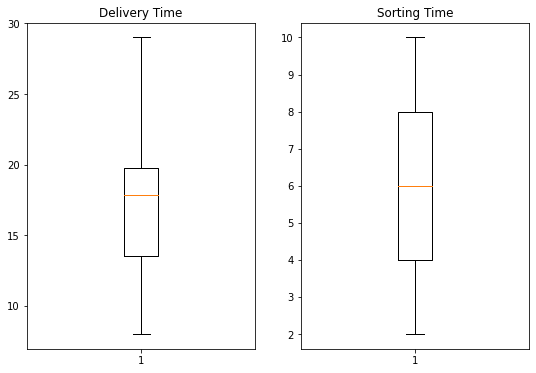

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df_delivery['Delivery Time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(df_delivery['Sorting Time'])
plt.title('Sorting Time')
plt.show()

__There are no outliers in the data__

## Assumption Check

### Collinearity check

In [10]:
df_delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


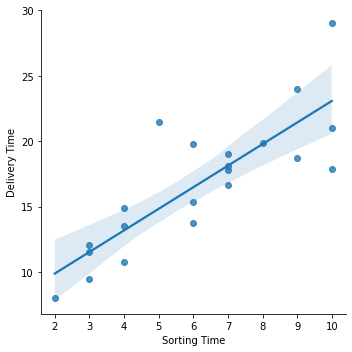

In [11]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=df_delivery)
plt.show()

- There is good correlation between the two variable.
- The score is more than 0.8 which is a good sign.

### Checking for Homosedacity

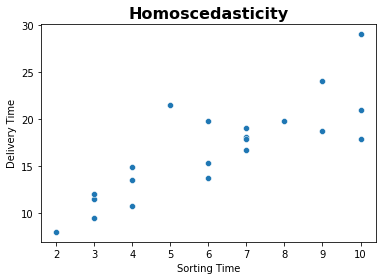

In [12]:
sns.scatterplot(x=df_delivery['Sorting Time'],y=df_delivery['Delivery Time'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [13]:
df_delivery.var()

Delivery Time    25.754619
Sorting Time      6.461905
dtype: float64

__As you can see in above graph__
- It shows as the Sorting Time Increases Delivery Time also increases with much variation along the way
- The data doesn't have any specific pattern in the variation, but we can't say the variation is homoscedasticity.

## Normality Check

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

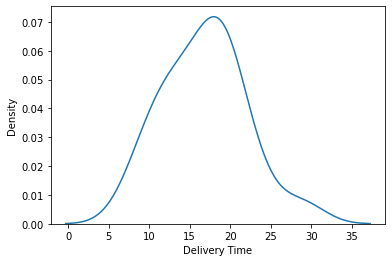

In [14]:
sns.distplot(df_delivery['Delivery Time'],hist=False,kde=True)

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

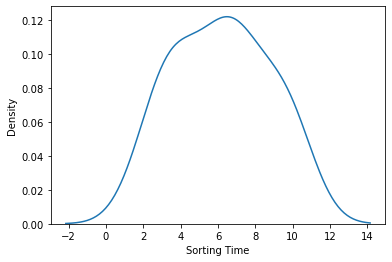

In [15]:
sns.distplot(df_delivery['Sorting Time'],hist=False,kde=True)

In [16]:
df_delivery.skew()

Delivery Time    0.352390
Sorting Time     0.047115
dtype: float64

_skew within 0.5 is negligible. we can process the data with linear model_

## Model Building

In [17]:
x=df_delivery[['Sorting Time']]
y=df_delivery[['Delivery Time']]

In [19]:
y

,Delivery Time
0,21.00
1,13.50
2,19.75
3,24.00
4,29.00
5,15.35
6,19.00
7,9.50
8,17.90
9,18.75


In [20]:
Linear_model1=sm.ols(formula='y~x',data=df_delivery).fit()

In [21]:
Linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        07:27:56   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
x              1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model Evaluation

In [22]:
y_pred_1 = Linear_model1.predict(x)

In [45]:
from sklearn.metrics import mean_squared_error,r2_score
Linear_model_mse=mean_squared_error(y,y_pred_1)
print('mean squared error is ',mean_squared_error(y,y_pred_1))
print('r2 score is ',r2_score(y,y_pred_1))
Linear_model_mse

mean squared error is  7.793311548584063
r2 score is  0.6822714748417231


7.793311548584063

### Taking Log Transformation

In [25]:
log_x = np.log(df_delivery[['Sorting Time']])

In [26]:
frames = [log_x,y]
log_model = pd.concat(frames,axis=1)
log_model

,Sorting Time,Delivery Time
0,2.302585,21.00
1,1.386294,13.50
2,1.791759,19.75
3,2.197225,24.00
4,2.302585,29.00
5,1.791759,15.35
6,1.945910,19.00
7,1.098612,9.50
8,2.302585,17.90
9,2.197225,18.75


In [28]:
Linear_model_2 = sm.ols(formula='y~log_x',data=log_model).fit()
Linear_model_2

In [30]:
Linear_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           2.64e-06
Time:                        07:33:15   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1597      2.455      0.472      0.642      -3.978       6.297
log_x          9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
y_pred_2 = Linear_model_2.predict(log_x)

In [32]:
y_pred_2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [33]:
Log_model_mse=mean_squared_error(y,y_pred_2)
print('mean squared error is ',mean_squared_error(y,y_pred_2))
print('r2 score is ',r2_score(y,y_pred_2))
Log_model_mse

mean squared error is  7.470226320948425
r2 score is  0.6954434611324223


7.470226320948425

## Square root Transformation on data

In [35]:
sqrt_x = np.sqrt(df_delivery[['Sorting Time']])

In [36]:
frames = [sqrt_x,y]
sqrt_model = pd.concat(frames,axis=1)
sqrt_model

,Sorting Time,Delivery Time
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [38]:
Linear_model_3 = sm.ols(formula='y~sqrt_x',data=sqrt_model).fit()
Linear_model_3

In [39]:
Linear_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           2.61e-06
Time:                        07:37:06   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_x         7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
Linear_model_3.params

Intercept   -2.518837
sqrt_x       7.936591
dtype: float64

In [41]:
y_pred_3 = Linear_model_3.predict(sqrt_x)

In [42]:
sqrt_model_mse=mean_squared_error(y,y_pred_3)
print('mean squared error is ',mean_squared_error(y,y_pred_3))
print('r2 score is ',r2_score(y,y_pred_3))
sqrt_model_mse

mean squared error is  7.461328308595395
r2 score is  0.695806227630867


7.461328308595395

## Model Evaluation

In [46]:
print('linear_model MSE is',np.sqrt(Linear_model_mse))
print('Linear_model_2 MSE is',np.sqrt(sqrt_model_mse))
print('Linear_model_1 MSE is',np.sqrt(Log_model_mse))

linear_model MSE is 2.7916503270617654
Linear_model_2 MSE is 2.7315432100912105
Linear_model_1 MSE is 2.733171476682066


- Sqrt model have comparitively low MSE

## Residual Plot to check Homoscedasticity or Hetroscedasticity

In [43]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

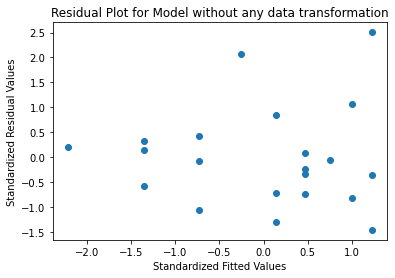

In [47]:
plt.scatter(get_standardized_values(Linear_model_2.fittedvalues), get_standardized_values(Linear_model_2.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

- The Model have Homoscedasciticity.
- The Residual(i.e Residual = Actual Value - Predicted Value) and the Fitted values do not share any Pattern.
- Hence, there is no relation between the Residual and the Fitted Value. It is Randomly distributed

## Model prediction

In [49]:
prediction = pd.DataFrame()
prediction['Sorting Time'] = df_delivery['Sorting Time']
prediction['Delivery Time'] = df_delivery['Delivery Time']
prediction['Predicted_Delivery Time'] = pd.DataFrame(Linear_model_2.predict(df_delivery))
prediction

,Sorting Time,Delivery Time,Predicted_Delivery Time
0,10,21.00,21.982913
1,4,13.50,13.696517
2,6,19.75,17.363305
3,9,24.00,21.030094
4,10,29.00,21.982913
5,6,15.35,17.363305
6,7,19.00,18.757354
7,3,9.50,11.094889
8,10,17.90,21.982913
9,9,18.75,21.030094
